# Machinehack Hckethon 2020: Winning Solution
### How I get 1% RMSE ??

In this notebook, I share the approaches that I used to get low rmse scores as posible. In this notebook, I have shared my different techniques and then share the rmse score I have gained in a public score(because We dont know the private score).

#### Note:

- All the RMSE score I have told is a public leaderboard Score.
- I comment on those cells that are not used in the final pipeline but help me improve my knowledge and score.
- Data Provided by the MH team are not correctly shuffled thats why Lots of people not getting good RMSE, but I try solving this issue you can see later on in the solution
- In all the whole part, I focused more on making the model more generalized.

#### In the overviews section and asking in telegrams, admins say sharing notebook, not necessary thats why I did save My lots of other things but In Some how I manegd to get our optimal solution. Dont mind idf RMSE score are Variece 2-3% with the actual solution becouse this is a optimum solution.

So let's get started.

Dont minds if any spelling or sentence mistakes; I am still improving my English.

In [1]:
#First of all we starting with importing basic libraries
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("Train.csv",parse_dates=["InvoiceDate"])
test_df = pd.read_csv("Test.csv",parse_dates=["InvoiceDate"])

In [3]:
train_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [4]:
test_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35
...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35


#### After Loading a data first I stared doing basic EDA operation to get some inshits from the dataset.
- We can eisly see the columns CustomerID,Decription,InvoiceNo and Stock code are Normal distributed but the rest of the columns are not distributed properly
- We can also notice that the values(ranges) contening in the Quantity, Country and UitePrice are very less compare to  other columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E16FA8388>,
      dtype=object)

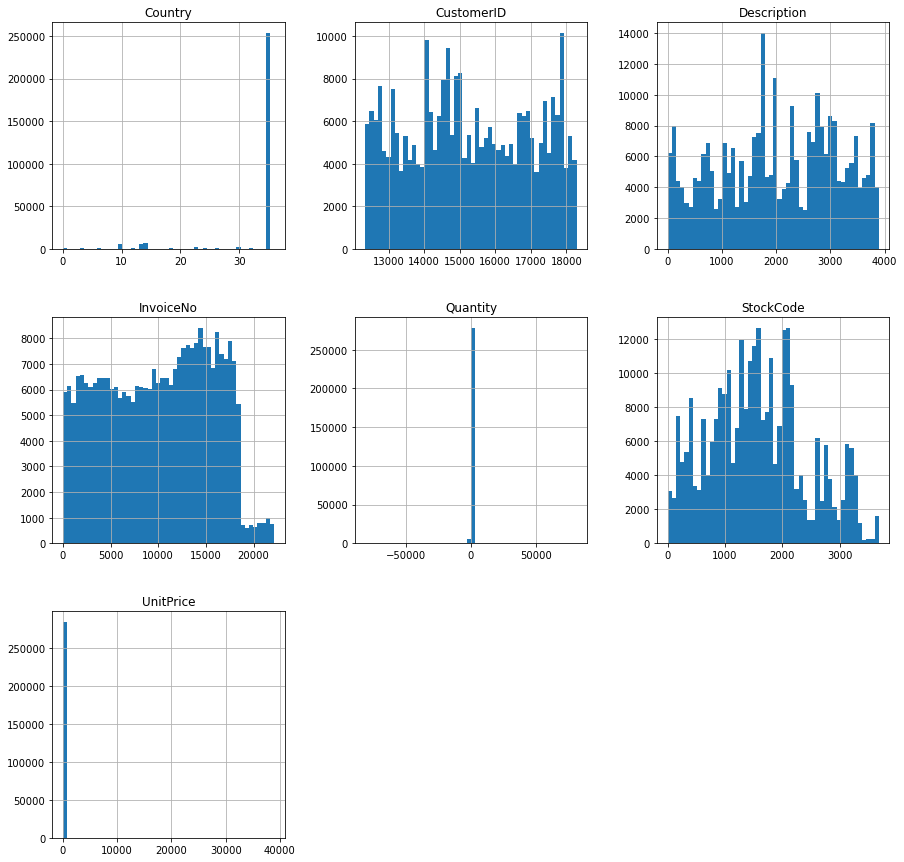

In [5]:
train_df.hist(bins=50, figsize=(15, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E17772A88>,
      dtype=object)

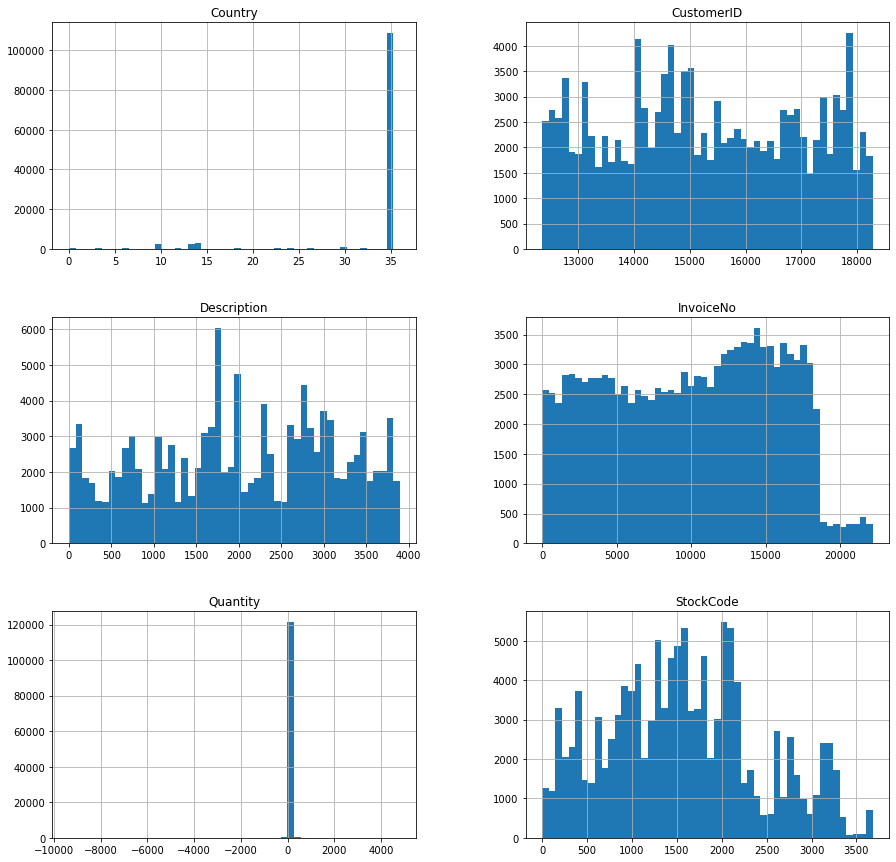

In [6]:
test_df.hist(bins=50, figsize=(15, 15))

##### We can performe the Null values checking is this dataset luckly the dataset not having any Null Values

In [7]:
train_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
test_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

##### We are more getting information about data we can see that the columns also having datetime values

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   UnitPrice    284780 non-null  float64       
 6   CustomerID   284780 non-null  float64       
 7   Country      284780 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.4 MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    122049 non-null  int64         
 1   StockCode    122049 non-null  int64         
 2   Description  122049 non-null  int64         
 3   Quantity     122049 non-null  int64         
 4   InvoiceDate  122049 non-null  datetime64[ns]
 5   CustomerID   122049 non-null  float64       
 6   Country      122049 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 6.5 MB


#### After doing all this thigs I started runing the simple model
- Droped InoviceDate Column
- Using RF algorithem
- RMSE: 26%

#### After Runing a simple model I started Doing features Engg. 
- First I try To Extracting features from the InvoiceDate Columns: [Year,Month,Day,Hours,Minuts]
- After Extracting Features I run the Model with diffrent Algorithem(Given Below).
- I got around RMSE: 24%

#### After Extracting DateTime Features I go for more and extracted some statical features:
- I extracted 5 Statical features and run the model.
- After Extracting Features I run the Model with diffrent Algorithem(Given Below).
- I got around RMSE: 24-25%

#### Lastly I try Merging statical + datetime the features in 1 dataframe but RMSE was not decresed.

#### After seeing in MH notebook submition columns I founds some peoples are also doing Like Droping Columns of Quantity and adding extra columns with 1 and 0 values where 1 menas Negative values and 0 are postive values.

I try this approch also an run the model but RMSE I was getting is likely 24%

#### After trying all the approches my RMSE not decresing belows 23% then I try Outlires REmoving approche

- I used Z_score method to remove the outlire from the dataset but that not work much.
- After removing outlire I managed to got approx 23-22% rmse

#### I also started the checking of some skewness in dataset:
- I found UnitPrice Having highy skewed.
- I try The power Transmision method to remove skevness of the dataset
- after doing that My model perfomence in Train data are improved and in locally I am getting less then 1% rmse
- But after uploading in LB I was getting 22% rmse 

In [11]:
train_df.skew()

InvoiceNo       -0.079704
StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
CustomerID       0.029524
Country         -3.050125
dtype: float64

In [12]:
test_df.skew()

InvoiceNo      -0.076200
StockCode       0.266920
Description    -0.132740
Quantity      -26.063548
CustomerID      0.030557
Country        -3.059695
dtype: float64

#### I also noticed that opints that database having duplicates values So I removed duplicates rows and largers values etc:

- I try remove duplicates and that improve my score little bit 1-2% rmse.
- I also Try to Droping Unneccesory Columns that help very much for me I got 2-3% less rmse score.
- Finally I founds lots of values are gretedr in data but mostly in normal range so I found the normal range and remove some extra data points that higher then normal one, thats help me improve my score 3-4%.
- After Doing all this things I got the 16-18% rmse score.

#### After Doing all this thigs I reallized that data are not propelry distributed in Train and Test by MH team, we are not got low rmse without data manupulation.
#### Thats why I started deeging more on the data and Find some loopholes that make my rmse score better.

In [13]:
train_df.corr().sort_values("UnitPrice", axis = 0, ascending = False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,284780.0,9955.394083,5551.519138,0.0,5069.00,10310.00,14657.00,22188.0
StockCode,284780.0,1573.386807,843.604991,0.0,939.00,1521.00,2106.00,3683.0
Description,284780.0,2023.955573,1089.812078,0.0,1141.00,1987.00,2945.00,3895.0
Quantity,284780.0,12.028468,295.111588,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,284780.0,3.451216,78.399541,0.0,1.25,1.95,3.75,38970.0
CustomerID,284780.0,15288.224278,1714.336529,12346.0,13953.00,15152.00,16794.00,18287.0
Country,284780.0,32.823846,6.743602,0.0,35.00,35.00,35.00,36.0


In [15]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,122049.0,9940.419692,5554.116349,0.0,5018.0,10311.0,14635.0,22189.0
StockCode,122049.0,1572.955788,845.106082,0.0,937.0,1523.0,2106.0,3683.0
Description,122049.0,2026.412744,1087.697388,0.0,1147.0,1987.0,2945.0,3895.0
Quantity,122049.0,12.137920,54.311646,-9360.0,2.0,5.0,12.0,4800.0
CustomerID,122049.0,15286.445256,1711.887591,12347.0,13953.0,15152.0,16782.0,18287.0
Country,122049.0,32.836795,6.726816,0.0,35.0,35.0,35.0,36.0


#### I checked the Dataset and see lots of values precents in Test data rows are not precents in the Train rows.
#### After That I start searching of the solution of this type of problem I found five notebook in kaggle that used the approches of Merging Train + Test data afcourse we dident having test data lables for that situation that fill that values to the Zero.
#### I am very excited to try this method becouse without doing this the rmse was not improving we need to overfit the model with some dummy data.

In [16]:
# I added the 0 values in UnitPrice Columns
test_df.insert(loc=5, column='UnitPrice', value=0)

In [17]:
# I merged the train and test daatset
data_gen = pd.concat([train_df,test_df])

In [18]:
# Shuffle the record properly
data_gen = data_gen.sample(frac=1).reset_index(drop=True)

After Doing this I saved the dataset for fruther used and performng some operation changing and fillings the values.

<font color='red'> Note: Please do not save againg becouse changed made by me in dataset are lost and your not getting purpose rmse score. </font>

In [19]:
#data_gen.to_csv("data_gen.csv", index=False)

#### After Saving the Dataset I used Excel sheet for data manupulation operation becouse doing small chnaged and run again and again in notebook are not posible and also doing in excel are more time frendly:

Note: I have done some task manully and some task autometicaly from excel sheet.

- Firstly I removed the larger values from quantity and unitprice like 80995.0 n quantity to 0 or median and 38970.0 uniteprice to zero 0 median.

- After that I start replecning zero values In UnitPrices with Min or Median or Max or avrage of above and belows rows etc.

- From doing above step I manged to got rmse 10% Locally and after uploading MH LB 6% rmse 

- After then I confident that manupulating data are very helping for me then I start changing more values and in every chnage I saved in excel and run on notebook.

- From filling the Zero values of uniteprice I try with comparing train data decriptioon and quantity and country columns and accourding the matching I fill that values.

- and also not matching values I filled the values using manully not all but some values and every changed I run the model and check the rsme value

- After doing all the above things I managed to got 4-6% rmse score on MH LB.

Note: Many peopels are saying in telegram groups that peopels are using external data avilabe on kaggle or UCI but there is diffrent encoding and rows peoples can see my approches there is no external data used in My case and got good RMSE.

In [20]:
#Changed data loading
data_gen = pd.read_csv("data_gen.csv")

In [21]:
data_gen

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,19291,1156,1208,-1,2011-02-24 13:05:00,2.95,12362.0,3
1,396,1713,1561,2,2010-12-05 15:47:00,2.10,14081.0,35
2,13493,1046,1201,2,2011-06-10 13:29:00,1.45,14449.0,35
3,16228,3683,2624,2,2011-11-14 14:23:00,28.00,12762.0,26
4,9099,171,1962,10,2011-07-07 17:35:00,1.65,16842.0,35
...,...,...,...,...,...,...,...,...
406824,17770,1580,147,4,2011-01-12 10:18:00,3.75,14146.0,35
406825,12817,1261,1769,10,2011-09-26 13:45:00,2.08,15078.0,35
406826,323,1548,3755,2,2010-12-05 11:02:00,2.10,13069.0,35
406827,17318,1833,3316,1,2011-11-25 11:54:00,1.25,15872.0,35


#### Also Points To be noted in changing minus values to plus in Quantity columns improve my rmse score 2-3%

In [22]:
test_df['Quantity'] = test_df['Quantity'].abs()
data_gen['Quantity'] = data_gen['Quantity'].abs()

In [23]:
data_gen.corr().sort_values("UnitPrice", axis = 0, ascending = False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
UnitPrice,0.007691,0.022913,-0.000130,-0.001334,1.000000,-0.004550,-0.005840
StockCode,0.087392,1.000000,-0.011504,0.001495,0.022913,0.003602,0.007961
InvoiceNo,1.000000,0.087392,0.023831,0.001200,0.007691,-0.005835,0.005271
Description,0.023831,-0.011504,1.000000,0.000728,-0.000130,-0.004231,-0.013817
Quantity,0.001200,0.001495,0.000728,1.000000,-0.001334,-0.005102,-0.008391
CustomerID,-0.005835,0.003602,-0.004231,-0.005102,-0.004550,1.000000,0.388294
Country,0.005271,0.007961,-0.013817,-0.008391,-0.005840,0.388294,1.000000


In [24]:
data_gen.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,406829.0,9950.901755,5552.295845,0.0,5060.00,10310.00,14651.00,22189.0
StockCode,406829.0,1573.257501,844.054584,0.0,937.00,1522.00,2106.00,3683.0
Description,406829.0,2024.692726,1089.177346,0.0,1143.00,1987.00,2945.00,3895.0
Quantity,406829.0,13.412279,248.624170,1.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.459429,69.311434,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0
Country,406829.0,32.827731,6.738565,0.0,35.00,35.00,35.00,36.0


In [25]:
# Droping Columns
test_df = test_df.drop(['InvoiceDate','UnitPrice'], axis=1)
data_gen = data_gen.drop(['InvoiceDate'], axis=1)

In [26]:
Y = data_gen['UnitPrice']
X = data_gen.drop(['UnitPrice'], axis=1)

#### I also try reducing dimentions using PCA That not much help me so thats wy I removed it on piplines 

#### After Doing all the data manupulation I start working in the models

- I compare All the models frpm sklearn
- And also added some extra popular algorithem Like Catboost,Xgboost etc
- I compare all the algorithem and come out with top 2 algorithem and make the esembel model.

In [27]:
#REgressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [28]:
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()

In [29]:
reg = {
"LinearRegression": LinearRegression(),
"KNeighborsRegressor":KNeighborsRegressor(n_neighbors=2),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"LGBMRegressor":LGBMRegressor(),
"Ridge": Ridge(alpha=1.0),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1),
"CatBoostRegressor":CatBoostRegressor(iterations=900, depth=5, learning_rate=0.05,loss_function = 'RMSE')
#"VottingRegressor": VotingRegressor([('rf', rf),('xgb',xgb),('et',et)],n_jobs=-1)
#"Stcking" : StackingRegressor(estimators=[('et', et),('xgb',xgb),('rf',rf)], final_estimator=LinearRegression(), cv=5)
}

In [30]:
%%time
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in reg.items():
    if name == 'CatBoostRegressor':
        model.fit(X, Y,verbose=False)
    else:
        model.fit(X, Y)
    #y_test_pre = model.predict(test_df)
    y_train_pre = model.predict(X)
    r2_train = r2_score(Y, y_train_pre)
    rmse_train  = np.sqrt(mean_squared_error(Y, y_train_pre))
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evalution-----")
    print("R2 Value: ", r2_score(Y, y_train_pre))
    print("RMSE: ",np.sqrt(mean_squared_error(Y, y_train_pre)))
    dic["Model"].append(name)
    dic["R2_Train"].append(r2_train)
    dic["RMSE_Train"].append(rmse_train)
#final_data = pd.DataFrame(dic)
#print("==================================================================")
#print("Best Model")
#print("==================================================================")
#print(final_data.max())
#print("==================================================================")
#final_data.sort_values("RMSE_Train", axis = 0, ascending = True)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evalution-----
R2 Value:  0.0006021863751117795
RMSE:  69.29047623461368
--------------------------------------------------------------
Model: KNeighborsRegressor
-----Training Data Evalution-----
R2 Value:  0.5493248758410699
RMSE:  46.53033103444352
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evalution-----
R2 Value:  -4.185335670461729
RMSE:  157.8311738369295
--------------------------------------------------------------
Model: LGBMRegressor
-----Training Data Evalution-----
R2 Value:  0.48982304803336973
RMSE:  49.506789815608386
--------------------------------------------------------------
Model: Ridge
-----Training Data Evalution-----
R2 Value:  0.0006021863751117795
RMSE:  69.29047623461368
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evalution-----
R2 Valu

In [33]:
final_data = pd.DataFrame(dic)
final_data

,Model,R2_Train,RMSE_Train
0,LinearRegression,0.000602,69.290476
1,KNeighborsRegressor,0.549325,46.530331
2,AdaBoostRegressor,-4.185336,157.831174
3,LGBMRegressor,0.489823,49.506790
4,Ridge,0.000602,69.290476
5,ElasticNet,0.000601,69.290527
6,GradientBoostingRegressor,0.903365,21.546262
7,DecisionTreeRegressor,0.994683,5.053844
8,ExtraTreesRegressor,0.994683,5.054231
9,RandomForestRegressor,0.816454,29.694548


#### We can see that  DecisionTreeRegressor and ExtraTreesRegressor are giving very less RMSE score on train data

In [34]:
final_data.sort_values("RMSE_Train", axis = 0, ascending = True)

,Model,R2_Train,RMSE_Train
7,DecisionTreeRegressor,0.994683,5.053844
8,ExtraTreesRegressor,0.994683,5.054231
10,XGBRegressor,0.990719,6.677229
11,CatBoostRegressor,0.922742,19.265356
6,GradientBoostingRegressor,0.903365,21.546262
9,RandomForestRegressor,0.816454,29.694548
1,KNeighborsRegressor,0.549325,46.530331
3,LGBMRegressor,0.489823,49.506790
0,LinearRegression,0.000602,69.290476
4,Ridge,0.000602,69.290476


#### I also try the Hyperperameter tuning but that not help much becouse model are not high dimentional data so eaisly get more overfitting

#### I esembeld top 2 model for final prediction

In [35]:
%%time

model = VotingRegressor([('et', et),('ds',ds)],n_jobs=-1)

model.fit(X, Y)

y_test_pre = model.predict(test_df)
y_train_pre = model.predict(X)
r2_train = r2_score(Y, y_train_pre)
rmse_train  = np.sqrt(mean_squared_error(Y, y_train_pre))
print("-----Training Data Evalution-----")
print("R2 Value: ", r2_score(Y, y_train_pre))
print("RMSE: ",np.sqrt(mean_squared_error(Y, y_train_pre)))

-----Training Data Evalution-----
R2 Value:  0.9946833869318654
RMSE:  5.053844509741533
Wall time: 23.1 s


#### After Saving The Model Score with diffrents Run I managed to got 3-4% RMSE Score but some runs I also got a 1% RMSE in but not a all time Becouse I dident saved the model thats why I come with the approches I used. with low RMSE Score.

#### After getting 1% rmse in some runs I also got 2% rmse and 3%rmse in some runs.

## Saving The Model

In [36]:
test_pre_df = {'UnitPrice': y_test_pre}
test_pre_df = pd.DataFrame(test_pre_df)

In [37]:
#test_pre_df['UnitPrice'] = test_pre_df['UnitPrice'].Round(5)

In [38]:
test_pre_df.head(50)

,UnitPrice
0,1.65
1,1.25
2,3.75
3,1.65
4,12.75
5,1.45
6,2.95
7,2.95
8,2.89
9,3.75


In [39]:
# saving the final output informateion to the .CSV file 
test_pre_df.to_csv("Submission.csv", index=False)

In [41]:
sorted(test_pre_df['UnitPrice'],reverse=True)

[8142.75,
 6930.0,
 4287.630000000002,
 3155.9500000000025,
 3034.0300000000016,
 2500.0,
 2053.0700000000024,
 2053.0700000000024,
 2033.1000000000017,
 1867.859999999998,
 1829.8399999999986,
 1687.170000000001,
 1687.170000000001,
 1241.9799999999996,
 1136.300000000001,
 1121.1799999999987,
 990.2675000000007,
 878.5500000000008,
 852.8000000000008,
 850.5,
 649.5,
 608.6600000000008,
 600.0,
 599.5,
 557.7200000000004,
 557.7200000000004,
 550.9400000000003,
 545.5800000000006,
 523.6399999999998,
 495.9800000000004,
 464.9000000000004,
 451.4199999999995,
 447.5599999999999,
 425.13999999999976,
 424.05999999999995,
 389.6800000000001,
 376.01800000000003,
 350.0,
 334.7099999999997,
 320.6899999999997,
 308.8199999999999,
 300.0,
 295.0,
 295.0,
 281.0,
 267.1199999999999,
 265.5,
 250.0,
 222.75,
 219.5,
 218.72000000000003,
 206.40000000000006,
 195.0,
 195.0,
 195.0,
 195.0,
 195.0,
 165.0,
 165.0,
 165.0,
 165.0,
 165.0,
 165.0,
 165.0,
 165.0,
 165.0,
 165.0,
 158.209999999